Beta: [5.65978458 1.36941666]
Beta Std Error: [0.20810286 0.39590504]
Beta Covariance: [[ 9.49339195  4.64972436]
 [ 4.64972436 34.35954285]]
Residual Variance: 0.004561783656711843
Inverse Condition #: 0.5395383422155255
Reason(s) for Halting:
  Sum of squares convergence
0.30621087363403704


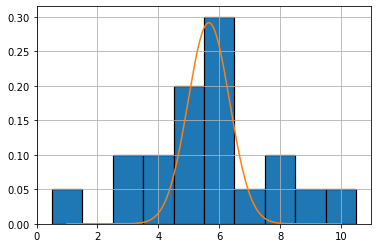

In [10]:
#Benotigte Madule(inkl. in Anaconda)
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random
from scipy.stats import norm

import sys

def gau(x,m,o):
    return (1/np.sqrt(2*np.pi*o**2))*np.exp(-(x-m)**2/(o**2)*2)

def func(B, x):
    [m1,o1]=B
    return gau(x,m1,o1)
    
def fit(x,y,x_err,y_err):
    #definerit die zu fittene Funktion,in B sind die Parameter und x ist die unabhängige
    model = Model(func)

    #Überprüft welche Fehler angegeben wurden
    if (np.isnan(x_err).any() and np.isnan(y_err).any()):
        data = RealData(x, y)
    elif np.isnan(x_err).any():
        data = RealData(x, y, sy=y_err)
    elif np.isnan(y_err).any():
        data = RealData(x, y, sx=x_err)
    else:
        data = RealData(x, y, sx=x_err, sy=y_err)
    
    #Führt den Fit aus, beta0 sind die Startwerte
    odr = ODR(data, model, beta0=[6.,1.])
    out = odr.run()
    #out.beta beinhaltet die Parameter
    #out.sd_beta beinhaltet die Fehler der Parameter
    return out

#U=600
U=np.array([600,500])
t2=np.array([1,1])
t1=np.array([1,1])
x=np.array([1,1])
s=x/1.875*10**(-4)
v1=s/t1
v2=s/t2
Q=(v1+v2)*np.sqrt(v1)/U*2*10**(-10)

stepsize=1

X=np.array([1,3,3,4,4,5,5,5,5,6,6,6,6,6,6,7,8,8,9,10]);

bins=np.arange(min(X)-stepsize/2,max(X)+stepsize/1.5,stepsize)
[n,binsh,ka]=plt.hist(X,bins=bins,density=True,edgecolor='black', linewidth=1.2)

xf=np.arange(min(X),max(X)+1,stepsize)
yf=n

out=fit(xf,yf,np.nan,np.nan)

x_p=np.linspace(min(X),max(X),1000)
y_p=func(out.beta,x_p)
f=plt.plot(x_p,y_p)
plt.grid()
out.pprint()
print(out.beta[1]/np.sqrt(len(X)))